# New models and dataframe - now updated until week 15

In [2]:
from combined_player import player_minutes_value
from html_scraper import db
from mongo_to_db import create_master_df

In [3]:
import pprint
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_columns', 50)

# Player Dataframe

In [14]:
games = db['games_update'].find()
players = db.players.find()

In [15]:
final_df = player_minutes_value(games, players)

In [18]:
final_df.head()

,player_id,player_name,club,birthday,age,foot,position_id,squad_num,height,total_minutes_played,transfer_value(sterlings),transfer_value(USD)
0,19132.0,Alexander Domínguez,Squad Club Atlético Vélez Sarsfield,"Jun 5, 1987 (31)",31,right,1,22.0,"1,95 m",1080.000000,£1.58m,2.01
1,27987.0,Lucas Hoyos,Squad Club Atlético Vélez Sarsfield,"Apr 29, 1989 (29)",29,right,1,12.0,"1,83 m",180.000000,£135k,0.17
2,30896.0,Gastón Díaz,Squad Club Atlético Vélez Sarsfield,"Mar 13, 1988 (30)",30,right,2,24.0,"1,75 m",986.483333,£450k,0.57
3,94225.0,Joaquín Laso,Squad Club Atlético Vélez Sarsfield,"Jul 4, 1990 (28)",28,right,2,6.0,"1,85 m",1080.000000,£270k,0.34
4,99779.0,Luis Abram,Squad Club Atlético Vélez Sarsfield,"Feb 27, 1996 (22)",22,left,2,29.0,"1,80 m",1170.000000,£405k,0.51


In [21]:
final_df['position_id'] = final_df['position_id'].replace(1, 'Goalie')
final_df['position_id'] = final_df['position_id'].replace(2, 'Defender')
final_df['position_id'] = final_df['position_id'].replace(3, 'Midfielder')
final_df['position_id'] = final_df['position_id'].replace(4, 'Forward')
final_df['position_id'] = final_df['position_id'].replace(5, 'Defender')

In [22]:
#minutes have been updated
final_df.head()

,player_id,player_name,club,birthday,age,foot,position_id,squad_num,height,total_minutes_played,transfer_value(sterlings),transfer_value(USD)
0,19132.0,Alexander Domínguez,Squad Club Atlético Vélez Sarsfield,"Jun 5, 1987 (31)",31,right,Goalie,22.0,"1,95 m",1080.000000,£1.58m,2.01
1,27987.0,Lucas Hoyos,Squad Club Atlético Vélez Sarsfield,"Apr 29, 1989 (29)",29,right,Goalie,12.0,"1,83 m",180.000000,£135k,0.17
2,30896.0,Gastón Díaz,Squad Club Atlético Vélez Sarsfield,"Mar 13, 1988 (30)",30,right,Defender,24.0,"1,75 m",986.483333,£450k,0.57
3,94225.0,Joaquín Laso,Squad Club Atlético Vélez Sarsfield,"Jul 4, 1990 (28)",28,right,Defender,6.0,"1,85 m",1080.000000,£270k,0.34
4,99779.0,Luis Abram,Squad Club Atlético Vélez Sarsfield,"Feb 27, 1996 (22)",22,left,Defender,29.0,"1,80 m",1170.000000,£405k,0.51


# Shots Dataframe

In [46]:
games = db['games_update'].find()
shots_df = create_master_df(games)

/Users/david/galvanize/super_liga_xg/mongo_to_db.py:69: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  final_df = pd.concat([attach_to_df, df], axis=0, ignore_index=True)
/Users/david/galvanize/super_liga_xg/dataframe_cleaner.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  input_df['is_goal'] = input_df.loc[:, 'shot_type'].isin([9, 11, 12, 13]).astype(int)


In [47]:
#2955 shots to 3437 shots 
shots_df.head()

,game_id,player_id,shot_coord_x1,shot_coord_x2,shot_coord_y1,shot_coord_y2,shot_coord_z1,shot_coord_z2,shot_id,shot_type,team_id,time_of_event(min),passed_from_id,pass_coord_x1,pass_coord_x2,pass_coord_y1,pass_coord_y2,pass_coord_z1,pass_coord_z2,corner_kick,shot_distance,shot_angle,assisted_shot,is_penalty_attempt,is_goal
0,448548,99779.0,6.67,0.00,1.51,-1.21,-1,0.83,22336297,11,20,1.033333,177285.0,0.89,12.44,29.36,-4.84,-1.0,-1.0,1.0,6.838786,12.755990,1.0,0.0,1.0
1,448548,60730.0,21.33,12.00,4.24,-0.91,-1,0.73,22336386,35,20,9.683333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,21.747333,11.242763,0.0,0.0,0.0
2,448548,177285.0,12.00,1.78,0.00,-3.03,-1,0.21,22336583,13,20,26.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.000000,0.000000,0.0,1.0,1.0
3,448548,185745.0,8.44,0.89,14.53,-6.66,-1,-1.00,22336723,33,20,38.883333,177285.0,22.67,6.22,3.93,19.67,-1.0,-1.0,0.0,16.803407,59.849102,1.0,0.0,0.0
4,448548,77892.0,22.22,0.44,13.92,-8.48,-1,-1.00,22336739,33,13,40.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,26.220122,32.065607,0.0,0.0,0.0


# Testing Models

In [29]:
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [30]:
from model_prep import create_rf_prep

In [48]:
#use later when retesting on whole dataset
model_ready = create_rf_prep(shots_df)

In [49]:
# model_ready.head()

In [50]:
shots_df.head()

,game_id,player_id,shot_coord_x1,shot_coord_x2,shot_coord_y1,shot_coord_y2,shot_coord_z1,shot_coord_z2,shot_id,shot_type,team_id,time_of_event(min),passed_from_id,pass_coord_x1,pass_coord_x2,pass_coord_y1,pass_coord_y2,pass_coord_z1,pass_coord_z2,corner_kick,shot_distance,shot_angle,assisted_shot,is_penalty_attempt,is_goal
0,448548,99779.0,6.67,0.00,1.51,-1.21,-1,0.83,22336297,11,20,1.033333,177285.0,0.89,12.44,29.36,-4.84,-1.0,-1.0,1.0,6.838786,12.755990,1.0,0.0,1.0
1,448548,60730.0,21.33,12.00,4.24,-0.91,-1,0.73,22336386,35,20,9.683333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,21.747333,11.242763,0.0,0.0,0.0
2,448548,177285.0,12.00,1.78,0.00,-3.03,-1,0.21,22336583,13,20,26.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.000000,0.000000,0.0,1.0,1.0
3,448548,185745.0,8.44,0.89,14.53,-6.66,-1,-1.00,22336723,33,20,38.883333,177285.0,22.67,6.22,3.93,19.67,-1.0,-1.0,0.0,16.803407,59.849102,1.0,0.0,0.0
4,448548,77892.0,22.22,0.44,13.92,-8.48,-1,-1.00,22336739,33,13,40.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,26.220122,32.065607,0.0,0.0,0.0


In [51]:
#holding 20% of data for last test
columns = ['player_id', 'shot_distance', 'shot_angle', 'assisted_shot', 'is_penalty_attempt']
holdout = shots_df.sample(frac=.2, random_state=8)
holdout_x = holdout[columns]
holdout_y = holdout['is_goal']

In [52]:
train = shots_df.drop(holdout.index).copy()
data = train[columns]
y = train['is_goal']
indices = train.index.values 

In [53]:
X_train, X_test,indices_train,indices_test = train_test_split(data,indices, test_size=0.33, random_state=8)

y_train, y_test = y[indices_train],  y[indices_test]

In [56]:
X_train.head()

,player_id,shot_distance,shot_angle,assisted_shot,is_penalty_attempt
2144,166900.0,12.419549,21.441602,0.0,0.0
2657,87323.0,17.180736,47.712851,0.0,0.0
1000,51413.0,5.733315,-71.912677,0.0,0.0
1880,57586.0,17.940864,19.707530,0.0,0.0
795,117606.0,13.343950,-2.620109,0.0,0.0


In [60]:
xgboost_model = XGBClassifier(learning_rate = 0.01, max_depth = 3, n_estimators = 300, random_state=8)
gradient_boost_model = GradientBoostingClassifier(learning_rate=0.01, max_depth=4, max_features='log2', min_samples_leaf=4, n_estimators=280, subsample=0.25, random_state=8)
random_forest_model = RandomForestClassifier(n_estimators=300, max_depth=3, verbose=1, random_state=8)

xgboost_model.fit(X_train, y_train)
gradient_boost_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

p_random_forest = random_forest_model.predict_proba(X_test)
p_gradient_boost =  gradient_boost_model.predict_proba(X_test)
p_xgboost = xgboost_model.predict_proba(X_test)

#need to concat these two arrays somehow...
ensemble_p_0 = (p_random_forest[:,0] + p_gradient_boost[:,0] + p_xgboost[:,0])/3
ensemble_p_1 = (p_random_forest[:,1] + p_gradient_boost[:,1] + p_xgboost[:,1])/3
# ensemble_p = np.concatenate(ensemble_p_0, ensemble_p_1, axis=0)

random_forest_ll = log_loss(y_test, p_random_forest)
gradient_boost_ll = log_loss(y_test, p_gradient_boost)
xgboost_ll = log_loss(y_test, p_xgboost)
ensemble_ll = log_loss(y_test, ensemble_p_1)
                                     

print("Ensemble Log Loss " + str(ensemble_ll))
print("Gradient Boost Log Loss " + str(gradient_boost_ll))
print("Random Forest Log Loss " + str(random_forest_ll))
print("XGBoost Log Loss " + str(xgboost_ll))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Ensemble Log Loss 0.28882624539156104
Gradient Boost Log Loss 0.29152874708401066
Random Forest Log Loss 0.287874556403954
XGBoost Log Loss 0.2925729067782802


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


# Tuning Gradient Boost and xG Boost

In [61]:
from model_prep import stage_score_plot

In [64]:
X_train, X_test,indices_train,indices_test = train_test_split(data,indices, test_size=0.33, random_state=8)

y_train, y_test = y[indices_train],  y[indices_test]

In [65]:
gbm1 = GradientBoostingClassifier(learning_rate=0.01, max_depth=1, max_features='log2', min_samples_leaf=4, n_estimators=300, subsample=0.25, random_state=8)
gbm2 = GradientBoostingClassifier(learning_rate=0.01, max_depth=2, max_features='log2', min_samples_leaf=4, n_estimators=300, subsample=0.25, random_state=8)
gbm3 = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, max_features='log2', min_samples_leaf=4, n_estimators=300, subsample=0.25, random_state=8)
gbm4 = GradientBoostingClassifier(learning_rate=0.01, max_depth=4, max_features='log2', min_samples_leaf=4, n_estimators=300, subsample=0.25, random_state=8)
gbm5 = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, max_features='log2', min_samples_leaf=4, n_estimators=300, subsample=0.25, random_state=8)
gbm6 = GradientBoostingClassifier(learning_rate=0.01, max_depth=6, max_features='log2', min_samples_leaf=4, n_estimators=300, subsample=0.25, random_state=8)

gbm1.fit(X_train, y_train)
gbm2.fit(X_train, y_train)
gbm3.fit(X_train, y_train)
gbm4.fit(X_train, y_train)
gbm5.fit(X_train, y_train)
gbm6.fit(X_train, y_train)

pgb1 =  gbm1.predict_proba(X_test)
pgb2 =  gbm2.predict_proba(X_test)
pgb3 =  gbm3.predict_proba(X_test)
pgb4 =  gbm4.predict_proba(X_test)
pgb5 =  gbm5.predict_proba(X_test)
pgb6 =  gbm6.predict_proba(X_test)


gb1_ll = log_loss(y_test, pgb1)
gb2_ll = log_loss(y_test, pgb2)
gb3_ll = log_loss(y_test, pgb3)
gb4_ll = log_loss(y_test, pgb4)
gb5_ll = log_loss(y_test, pgb5)
gb6_ll = log_loss(y_test, pgb6)

print("GB depth 1 log loss " + str(gb1_ll))
print("GB depth 2 log loss " + str(gb2_ll))
print("GB depth 3 log loss " + str(gb3_ll))
print("GB depth 4 log loss " + str(gb4_ll))
print("GB depth 5 log loss " + str(gb5_ll))
print("GB depth 6 log loss " + str(gb6_ll))

GB depth 1 log loss 0.28950655950569515
GB depth 2 log loss 0.28730059307451217
GB depth 3 log loss 0.2890129682917843
GB depth 4 log loss 0.29262957116075183
GB depth 5 log loss 0.29343246178918314
GB depth 6 log loss 0.2958582057337783


### Tuning:

Best depth: 2, Trees: 260

lowest test error(log loss): 0.28950655950569515
num_trees at lowest test error: 299


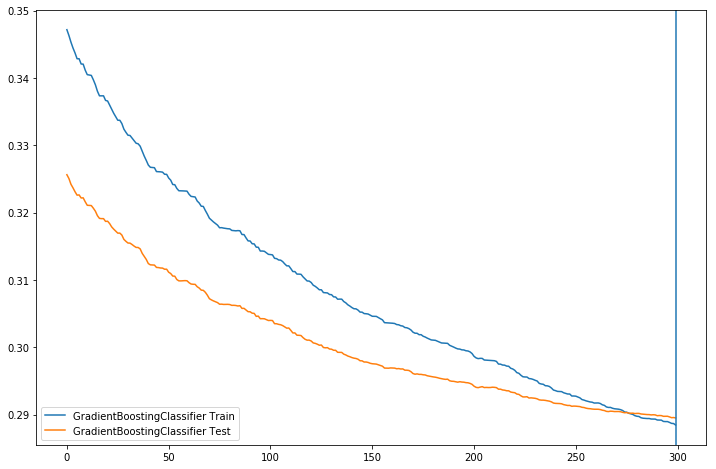

In [66]:
stage_score_plot(gbm1, X_train, y_train, X_test, y_test)

lowest test error(log loss): 0.28712080482990404
num_trees at lowest test error: 261


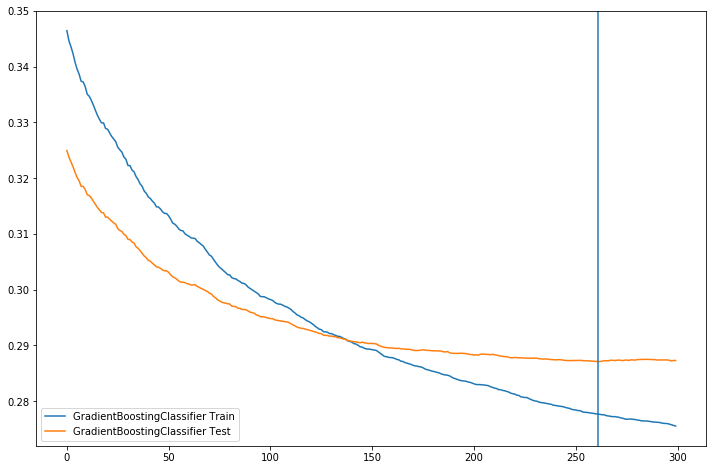

In [67]:
stage_score_plot(gbm2, X_train, y_train, X_test, y_test)

lowest test error(log loss): 0.28838334332749765
num_trees at lowest test error: 218


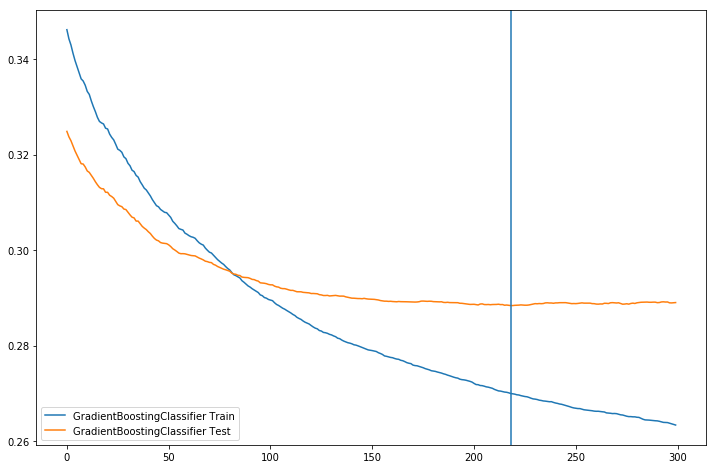

In [68]:
stage_score_plot(gbm3, X_train, y_train, X_test, y_test)

lowest test error(log loss): 0.29009802823347297
num_trees at lowest test error: 207


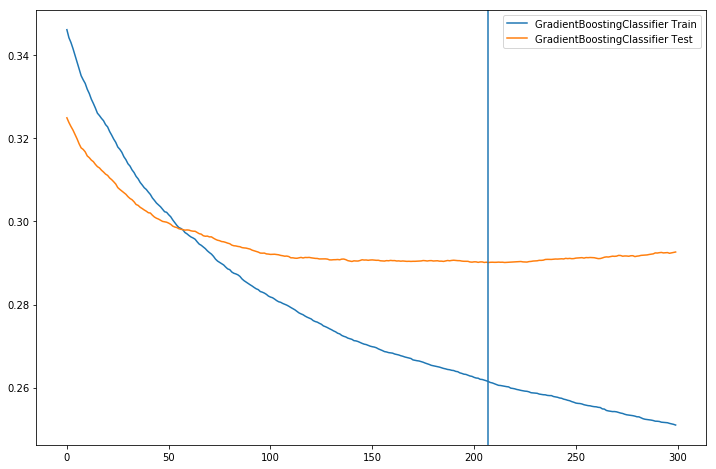

In [69]:
stage_score_plot(gbm4, X_train, y_train, X_test, y_test)

### XGBoost Tuning

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
X_train, X_test,indices_train,indices_test = train_test_split(data,indices, test_size=0.33, random_state=8)

y_train, y_test = y[indices_train],  y[indices_test]

In [78]:
xgb1 = XGBClassifier(learning_rate=0.01, n_estimators=200, random_state=8)
xgb2 = XGBClassifier(learning_rate=0.01, n_estimators=300, random_state=8)
xgb3 = XGBClassifier(learning_rate=0.01, n_estimators=400, random_state=8)
xgb4 = XGBClassifier(learning_rate=0.01, n_estimators=500, random_state=8)
xgb5 = XGBClassifier(learning_rate=0.01, n_estimators=600, random_state=8)

xgb1.fit(X_train, y_train)
xgb2.fit(X_train, y_train)
xgb3.fit(X_train, y_train)
xgb4.fit(X_train, y_train)
xgb5.fit(X_train, y_train)


xgb_p1 =  xgb1.predict_proba(X_test)
xgb_p2 =  xgb2.predict_proba(X_test)
xgb_p3 =  xgb3.predict_proba(X_test)
xgb_p4 =  xgb4.predict_proba(X_test)
xgb_p5 =  xgb5.predict_proba(X_test)



xgb1_ll = log_loss(y_test, xgb_p1)
xgb2_ll = log_loss(y_test, xgb_p2)
xgb3_ll = log_loss(y_test, xgb_p3)
xgb4_ll = log_loss(y_test, xgb_p4)
xgb5_ll = log_loss(y_test, xgb_p5)


print("XGB n_estimators: 200 log loss " + str(xgb1_ll))
print("XGB n_estimators: 300 log loss " + str(xgb2_ll))
print("XGB n_estimators: 400 log loss " + str(xgb3_ll))
print("XGB n_estimators: 500 log loss " + str(xgb4_ll))
print("XGB n_estimators: 600 log loss " + str(xgb5_ll))

XGB n_estimators: 200 log loss 0.30542209458082
XGB n_estimators: 300 log loss 0.2925729067782802
XGB n_estimators: 400 log loss 0.29011109472962204
XGB n_estimators: 500 log loss 0.29037029805310105
XGB n_estimators: 600 log loss 0.29166967738501826


Best n_estimators of XGB: 400

# Re-run and test on holdout set with tuned parameters

In [86]:
#holding 20% of data for last test
columns = ['player_id', 'shot_distance', 'shot_angle', 'assisted_shot', 'is_penalty_attempt']
holdout = shots_df.sample(frac=.2, random_state=8)
holdout_x = holdout[columns]
holdout_y = holdout['is_goal']
indices_holdout = holdout.index.values

train = shots_df.drop(holdout.index).copy()
data = train[columns]
y = train['is_goal']
indices = train.index.values 

In [87]:
X_train, X_test,indices_train,indices_test = train_test_split(data,indices, test_size=0.33, random_state=8)

y_train, y_test = y[indices_train],  y[indices_test]

In [88]:
xgboost_model = XGBClassifier(learning_rate = 0.01, max_depth = 3, n_estimators = 400, random_state=8)
gradient_boost_model = GradientBoostingClassifier(learning_rate=0.01, max_depth=4, max_features='log2', min_samples_leaf=4, n_estimators=260, subsample=0.25, random_state=8)
random_forest_model = RandomForestClassifier(n_estimators=300, max_depth=3, verbose=1, random_state=8)

xgboost_model.fit(X_train, y_train)
gradient_boost_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

p_random_forest = random_forest_model.predict_proba(X_test)
p_gradient_boost =  gradient_boost_model.predict_proba(X_test)
p_xgboost = xgboost_model.predict_proba(X_test)

#need to concat these two arrays somehow...
ensemble_p_0 = (p_random_forest[:,0] + p_gradient_boost[:,0] + p_xgboost[:,0])/3
ensemble_p_1 = (p_random_forest[:,1] + p_gradient_boost[:,1] + p_xgboost[:,1])/3
# ensemble_p = np.concatenate(ensemble_p_0, ensemble_p_1, axis=0)

random_forest_ll = log_loss(y_test, p_random_forest)
gradient_boost_ll = log_loss(y_test, p_gradient_boost)
xgboost_ll = log_loss(y_test, p_xgboost)
ensemble_ll = log_loss(y_test, ensemble_p_1)
                                     

print("Ensemble Log Loss " + str(ensemble_ll))
print("Gradient Boost Log Loss " + str(gradient_boost_ll))
print("Random Forest Log Loss " + str(random_forest_ll))
print("XGBoost Log Loss " + str(xgboost_ll))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Ensemble Log Loss 0.287954165246984
Gradient Boost Log Loss 0.2912567846494751
Random Forest Log Loss 0.287874556403954
XGBoost Log Loss 0.29011109472962204


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


### Testing on Holdout Set

In [89]:
p_random_forest = random_forest_model.predict_proba(holdout_x)
p_gradient_boost =  gradient_boost_model.predict_proba(holdout_x)
p_xgboost = xgboost_model.predict_proba(holdout_x)

#need to concat these two arrays somehow...
ensemble_p_0 = (p_random_forest[:,0] + p_gradient_boost[:,0] + p_xgboost[:,0])/3
ensemble_p_1 = (p_random_forest[:,1] + p_gradient_boost[:,1] + p_xgboost[:,1])/3
# ensemble_p = np.concatenate(ensemble_p_0, ensemble_p_1, axis=0)

random_forest_ll = log_loss(holdout_y, p_random_forest)
gradient_boost_ll = log_loss(holdout_y, p_gradient_boost)
xgboost_ll = log_loss(holdout_y, p_xgboost)
ensemble_ll = log_loss(holdout_y, ensemble_p_1)
                                     

print("Ensemble Log Loss " + str(ensemble_ll))
print("Gradient Boost Log Loss " + str(gradient_boost_ll))
print("Random Forest Log Loss " + str(random_forest_ll))
print("XGBoost Log Loss " + str(xgboost_ll))

Ensemble Log Loss 0.31997520435077936
Gradient Boost Log Loss 0.32214266328226376
Random Forest Log Loss 0.32191015085452257
XGBoost Log Loss 0.3214137939982973


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
